In [1]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999

In [2]:
def load_original_data():
    return pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv" )

In [3]:
def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    df=df.drop(columns=['unnamed:_0', 'vehicle_type',"customer","number_of_open_complaints"])
    df=df.dropna()
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    df["month"]=list(map(lambda date:date.strftime(format="%B"),df["effective_to_date"]))
    return df

In [4]:
def transform(df):
    df=df[df['income']>0]
    df["total_claim_amount"]=round(df["total_claim_amount"],0)
    df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0)
    df.vehicle_class[customers_df.vehicle_class.isin(["Luxury Car","Luxury SUV"])] = "Luxury Car"
    df.vehicle_class[customers_df.vehicle_class.isin(["Four-Door Car","SUV"])] = "Four-Door Car"
    df.policy[df.policy.isin(["Personal L3","Personal L2","Personal L1"]) ] = "Personal"
    df.policy[df.policy.isin(["Corporate L3","Corporate L2","Corporate L1"]) ] = "Corporate"
    df.policy[df.policy.isin(["Special L3","Special L2","Special L1"]) ] = "Special"
    df=df.drop(columns=["month","education"])
    df.number_of_policies[df.number_of_policies>2]=3
    return df

In [5]:
customers_df=load_original_data()
customers_df=clean_data(customers_df)
customers_df=transform(customers_df)

<ipython-input-4-d81fbe62968f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_claim_amount"]=round(df["total_claim_amount"],0)
<ipython-input-4-d81fbe62968f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0)
<ipython-input-4-d81fbe62968f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [6]:
customers_df.shape

(6817, 21)

In [7]:
customers_df.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

## Plotting
EDA Catgorical Columns

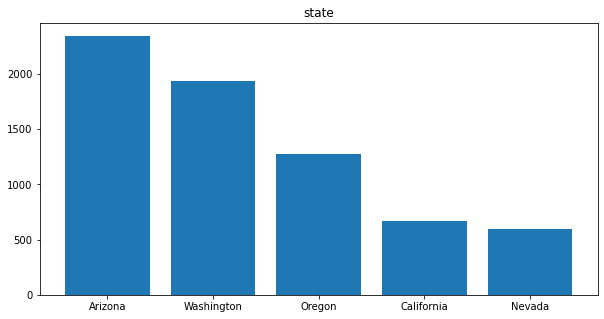

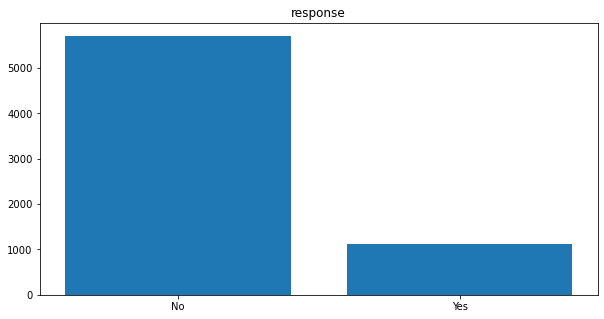

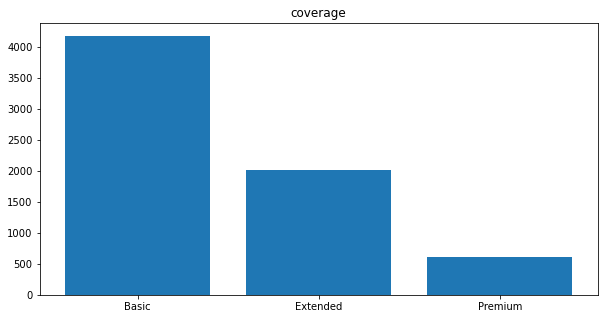

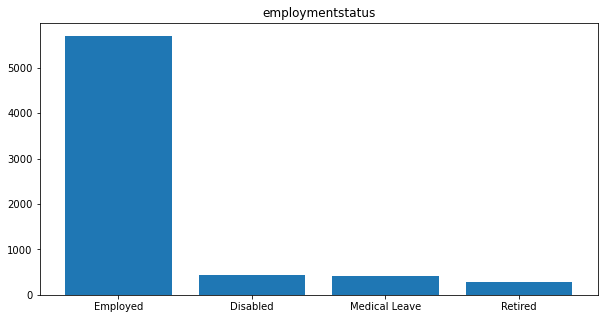

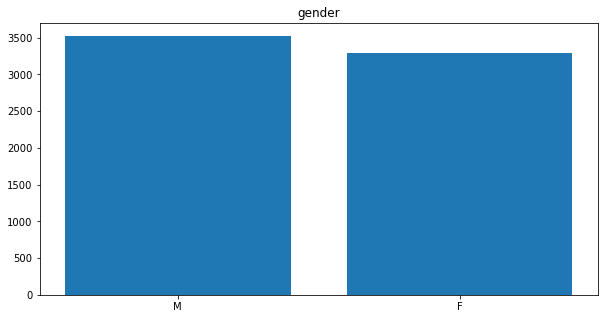

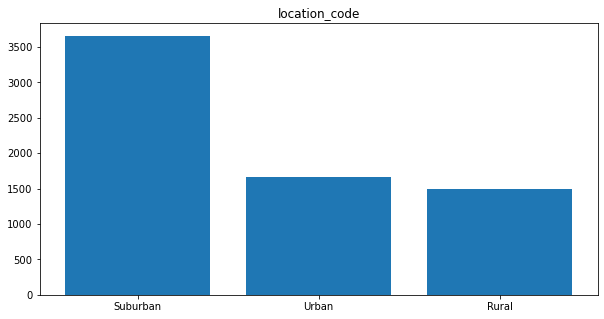

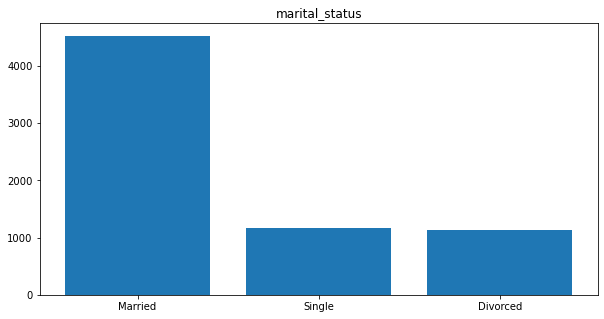

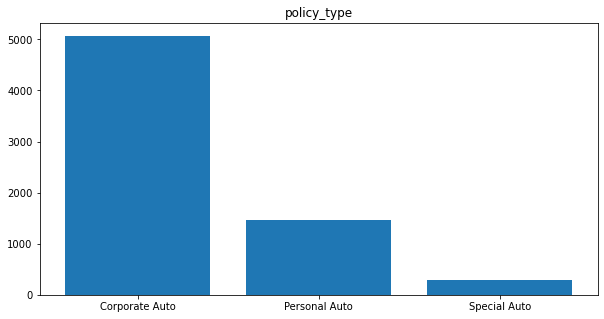

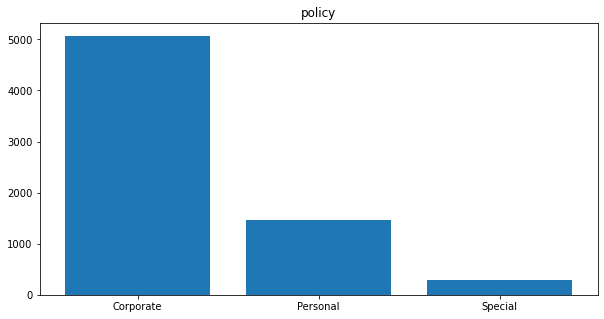

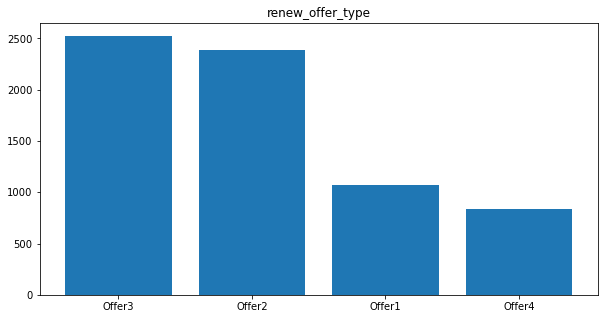

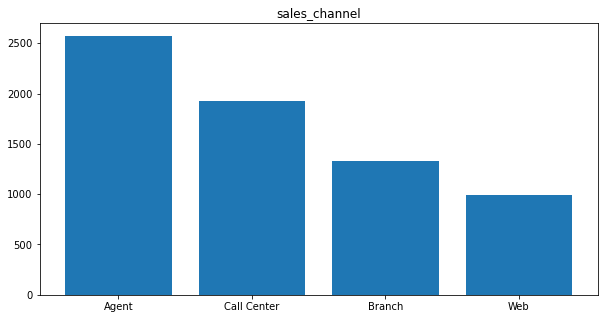

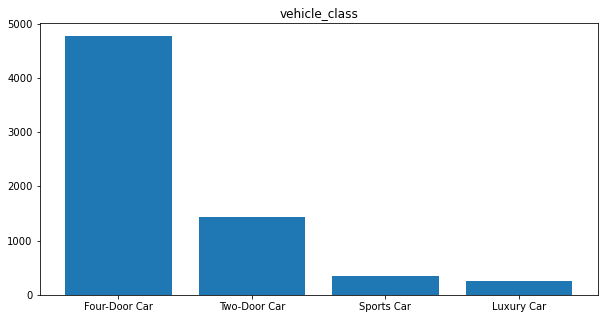

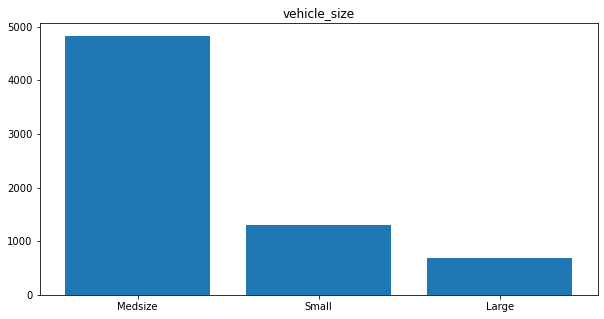

In [8]:
for c in customers_df.select_dtypes(object):
    plt.figure(figsize=(10,5))
    plt.bar(customers_df[c].unique(), customers_df[c].value_counts())
    plt.title(c)
    plt.show();

## Show a plot of the total number of responses.

<AxesSubplot:>

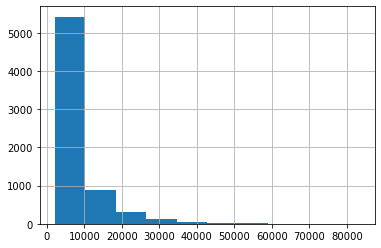

In [9]:
customers_df.customer_lifetime_value.hist()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


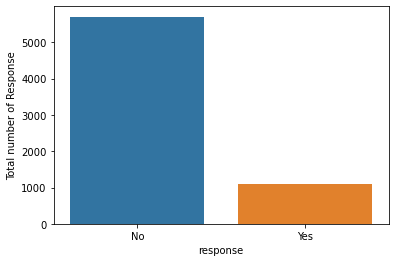

In [10]:
sns.countplot('response', data=customers_df)
plt.ylabel('Total number of Response')
plt.show()

## Show a plot of the response rate by the sales channel.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


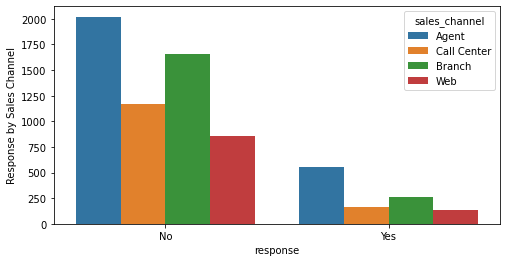

In [11]:
plt.figure(figsize=(8,4))
sns.countplot('response', hue='sales_channel', data=customers_df)
plt.ylabel('Response by Sales Channel')
plt.show()

## Show a plot of the response rate by the total claim amount.

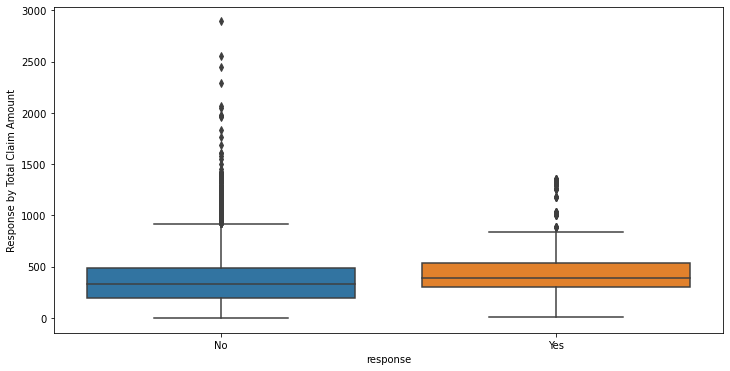

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(y='total_claim_amount' , x='response', data=customers_df)
plt.ylabel('Response by Total Claim Amount')
plt.show()

## Show a plot of the response rate by income.

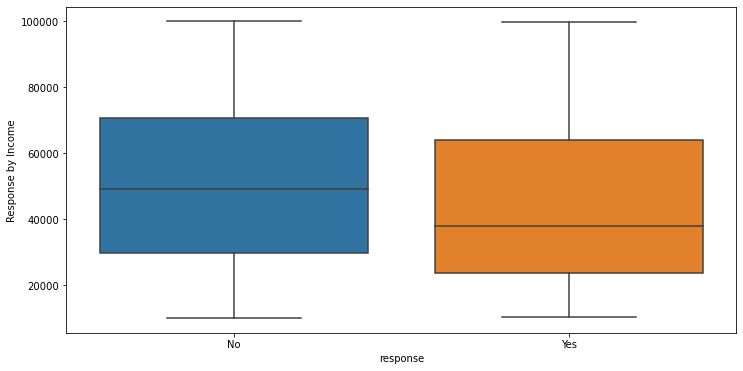

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(y='income' , x='response', data=customers_df)
plt.ylabel('Response by Income')
plt.show()

## Data Transformation Lab

Check normality visually.

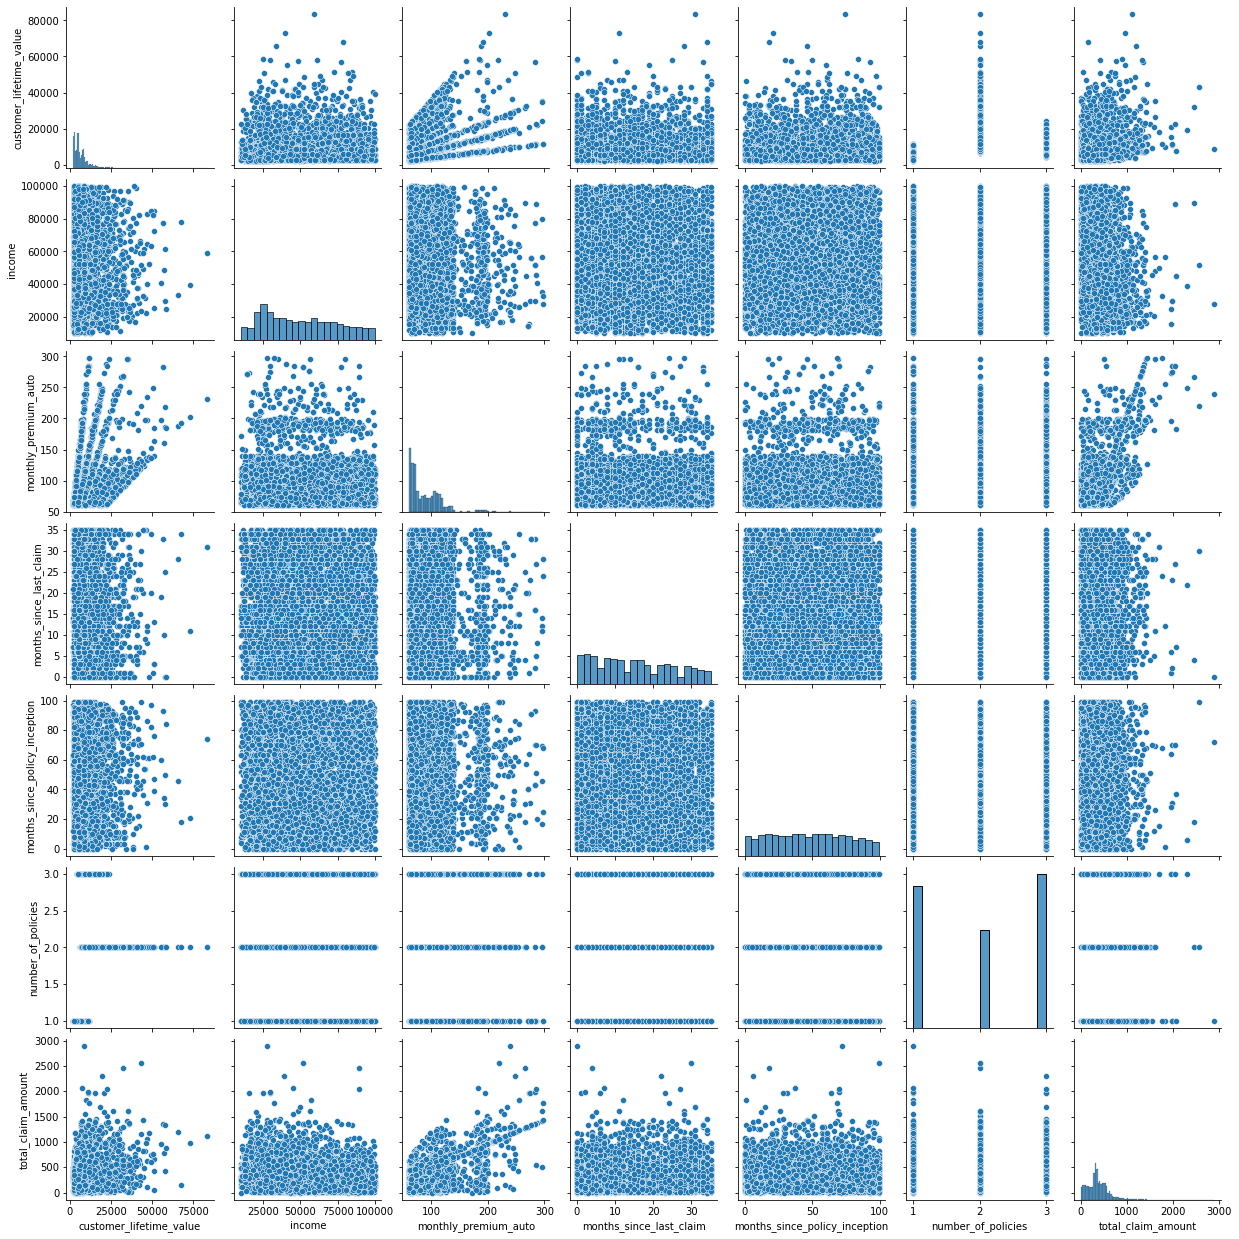

In [14]:
sns.pairplot(customers_df)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

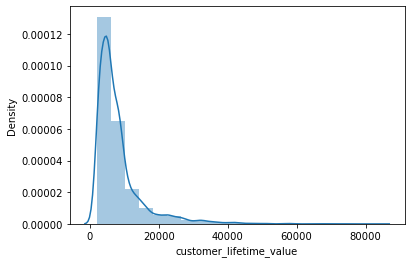

In [15]:
sns.distplot((customers_df['customer_lifetime_value']), bins=20)

In [16]:
monthly=boxcox(customers_df['customer_lifetime_value'],lmbda=-0.04)

<AxesSubplot:ylabel='Count'>

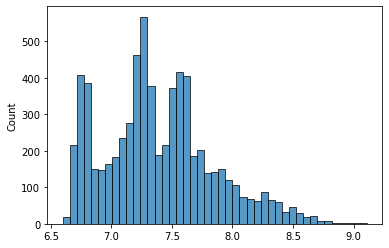

In [17]:
sns.histplot(monthly)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

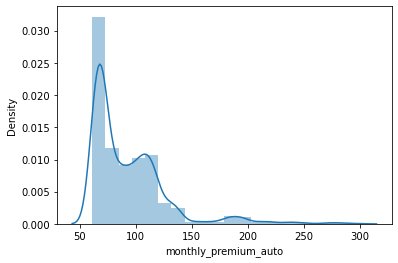

In [18]:
sns.distplot((customers_df['monthly_premium_auto']), bins=20)

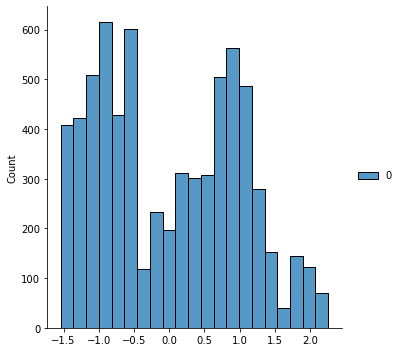

In [19]:
pt = PowerTransformer()
monthly=pt.fit_transform(customers_df['monthly_premium_auto'].to_numpy().reshape(-1,1))
sns.displot(monthly)

<AxesSubplot:ylabel='Count'>

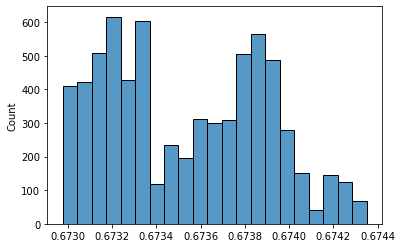

In [20]:
monthly,lam=boxcox(customers_df['monthly_premium_auto'])
sns.histplot(monthly)

<AxesSubplot:ylabel='Count'>

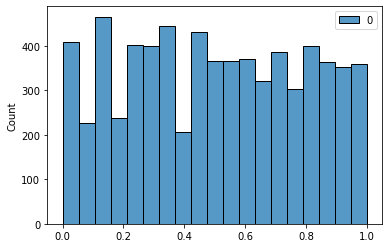

In [21]:
qt = QuantileTransformer()
monthly=qt.fit_transform(customers_df['monthly_premium_auto'].to_numpy().reshape(-1,1))
sns.histplot(monthly)

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='total_claim_amount'>

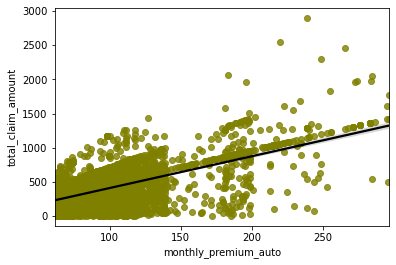

In [22]:
sns.regplot(x='monthly_premium_auto',y='total_claim_amount', data=customers_df, scatter_kws={"color": "olive"}, line_kws={"color": "black"})

In [23]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6817 entries, 0 to 10908
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          6817 non-null   object        
 1   customer_lifetime_value        6817 non-null   float64       
 2   response                       6817 non-null   object        
 3   coverage                       6817 non-null   object        
 4   effective_to_date              6817 non-null   datetime64[ns]
 5   employmentstatus               6817 non-null   object        
 6   gender                         6817 non-null   object        
 7   income                         6817 non-null   int64         
 8   location_code                  6817 non-null   object        
 9   marital_status                 6817 non-null   object        
 10  monthly_premium_auto           6817 non-null   int64         
 11  months_since_las

In [24]:
df = customers_df


In [25]:
# Identify all the cathegorical columns 
[col for col in df.columns if not col in df._get_numeric_data().columns]

['state',
 'response',
 'coverage',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [26]:
# save a new subset -> numerical columns as the new DF
numerical = df._get_numeric_data()
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,4809.0,48029,61,7.0,52,3,293.0
2,14948.0,22139,100,34.0,31,2,480.0
3,22332.0,49078,97,10.0,3,2,484.0
6,5035.0,37405,63,8.0,99,3,288.0
7,4956.0,87197,63,35.0,45,3,247.0
...,...,...,...,...,...,...,...
10902,3579.0,28304,91,10.0,30,1,655.0
10903,2772.0,59855,74,30.0,82,1,355.0
10906,5259.0,61146,65,7.0,68,3,273.0
10907,23893.0,39837,201,11.0,63,2,381.0


In [27]:
# save a new subset -> cathegorical columns as the new DF
categorical=[i for i in df.columns if df.dtypes[i]=='object']
categorical

['state',
 'response',
 'coverage',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [28]:
# split between the independent variables and the target variable
X=numerical.drop('total_claim_amount', axis=1)
y=numerical.total_claim_amount

In [29]:
# scaling the data and splitting it into train and test
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test , columns = X.columns)

## Build a pipeline for validation metrics

In [30]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square
    


In [31]:
# preparing data for linear regression

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression(normalize=True)
ols.fit(X_train,y_train)

# predictions for our model
pred = ols.predict(X_test)

# regression evaluation metrics
test_pred = ols.predict(X_test)
train_pred = ols.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 134.807916822458
MSE: 34938.72925127386
RMSE: 186.9190446457339
R2 Square 0.43490787010876986
__________________________________
Train set evaluation:
_____________________________________
MAE: 132.08901684740582
MSE: 35130.45490693159
RMSE: 187.43120046281408
R2 Square 0.4565269663539192
__________________________________


## Model Evaluation

In [33]:
# print the intercept
print(ols.intercept_)

380.99517920771325


In [34]:
#pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

In [35]:
#pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

In [36]:
coeff_df = pd.DataFrame(ols.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
customer_lifetime_value,-2.436824
income,-55.768763
monthly_premium_auto,162.629114
months_since_last_claim,-4.200221
months_since_policy_inception,-6.062811
number_of_policies,-1.175408


In [37]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,134.807917,34938.729251,186.919045,0.434908,0.445247


## Robust Regression

In [38]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 149.44728091064277
MSE: 40766.6972800407
RMSE: 201.9076454224572
R2 Square 0.3406474623352451
__________________________________
Train set evaluation:
_____________________________________
MAE: 144.30736272732375
MSE: 39619.26887678886
RMSE: 199.04589640781057
R2 Square 0.387084388620891
__________________________________


In [39]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,134.807917,34938.729251,186.919045,0.434908,0.445247
1,Robust Regression,149.447281,40766.697280,201.907645,0.340647,0.345254


## Lasso Regression

In [40]:
# A linear model trained with  ℓ1  prior as regularizer.
# The lasso estimate thus solves the minimization of the 
# least-squares penalty with  α|w|1  added, where  α  is
# a constant and  |w|1  is the  ℓ1−norm  of the parameter vector.

from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 144.49154232365655
MSE: 37322.255637450784
RMSE: 193.1896882275314
R2 Square 0.3963571834902072
__________________________________
Train set evaluation:
_____________________________________
MAE: 143.91313246978922
MSE: 38298.54545259902
RMSE: 195.70014167751393
R2 Square 0.40751616406625446
__________________________________


In [41]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,134.807917,34938.729251,186.919045,0.434908,0.445247
1,Robust Regression,149.447281,40766.697280,201.907645,0.340647,0.345254
2,Lasso Regression,144.491542,37322.255637,193.189688,0.396357,0.445329


## Ridge Regression

In [42]:
# Ridge regression addresses some of the problems of Ordinary Least Squares
# by imposing a penalty on the size of coefficients. The ridge coefficients
# minimize a penalized residual sum of squares. Ridge regression is an L2 penalized model

from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 135.0408622344148
MSE: 34889.29315197914
RMSE: 186.78675850278879
R2 Square 0.4357074398482145
__________________________________
Train set evaluation:
_____________________________________
MAE: 132.31328866545488
MSE: 35145.26913335513
RMSE: 187.47071540204652
R2 Square 0.4562977882064443
__________________________________


In [43]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,134.807917,34938.729251,186.919045,0.434908,0.445247
1,Robust Regression,149.447281,40766.697280,201.907645,0.340647,0.345254
2,Lasso Regression,144.491542,37322.255637,193.189688,0.396357,0.445329
3,Ridge Regression,135.040862,34889.293152,186.786759,0.435707,0.445247


## Elastic Net

In [44]:
# A linear regression model trained with L1 and L2 prior as regularizer.
# This combination allows for learning a sparse model where few of the weights are non-zero like Lasso,
# while still maintaining the regularization properties of Ridge.

from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 134.90590993062577
MSE: 34905.89936622954
RMSE: 186.83120554722527
R2 Square 0.43543885420754336
__________________________________
Train set evaluation:
_____________________________________
MAE: 132.19599979515021
MSE: 35134.57294862644
RMSE: 187.44218561632928
R2 Square 0.45646325967495616
__________________________________


In [45]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,134.807917,34938.729251,186.919045,0.434908,0.445247
1,Robust Regression,149.447281,40766.697280,201.907645,0.340647,0.345254
2,Lasso Regression,144.491542,37322.255637,193.189688,0.396357,0.445329
3,Ridge Regression,135.040862,34889.293152,186.786759,0.435707,0.445247
4,Elastic Net Regression,134.905910,34905.899366,186.831206,0.435439,0.445321


## Polynomial Regression

In [46]:
# One common pattern within machine learning is to use linear models
#trained on nonlinear functions of the data. This approach maintains
#the generally fast performance of linear methods, while allowing them
# to fit a much wider range of data.

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 135.68925080933454
MSE: 34313.36335849047
RMSE: 185.23866593800136
R2 Square 0.4450224149673643
__________________________________
Train set evaluation:
_____________________________________
MAE: 132.47876712689077
MSE: 33730.36349676921
RMSE: 183.65827914028057
R2 Square 0.47818657560402966
__________________________________


In [47]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,134.807917,34938.729251,186.919045,0.434908,0.445247
1,Robust Regression,149.447281,40766.697280,201.907645,0.340647,0.345254
2,Lasso Regression,144.491542,37322.255637,193.189688,0.396357,0.445329
3,Ridge Regression,135.040862,34889.293152,186.786759,0.435707,0.445247
4,Elastic Net Regression,134.905910,34905.899366,186.831206,0.435439,0.445321
5,Polynomail Regression,135.689251,34313.363358,185.238666,0.445022,0.000000


## Stochastic Gradient Descent


In [48]:
# Gradient Descent is a very generic optimization algorithm capable of
# finding optimal solutions to a wide range of problems. The general
# idea of Gradient Sescent is to tweak parameters iteratively in order
# to minimize a cost function. Gradient Descent measures the local gradient
# of the error function with regards to the parameters vector, and it goes 
# in the direction of descending gradient. Once the gradient is zero, you
# have reached a minimum.

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 134.80795049940707
MSE: 34938.702907096624
RMSE: 186.91897417623665
R2 Square 0.43490829619430715
__________________________________
Train set evaluation:
_____________________________________
MAE: 132.08906238447682
MSE: 35130.45490853928
RMSE: 187.4312004671028
R2 Square 0.456526966329048
__________________________________


In [49]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,134.807917,34938.729251,186.919045,0.434908,0.445247
1,Robust Regression,149.447281,40766.697280,201.907645,0.340647,0.345254
2,Lasso Regression,144.491542,37322.255637,193.189688,0.396357,0.445329
3,Ridge Regression,135.040862,34889.293152,186.786759,0.435707,0.445247
4,Elastic Net Regression,134.905910,34905.899366,186.831206,0.435439,0.445321
5,Polynomail Regression,135.689251,34313.363358,185.238666,0.445022,0.000000
6,Stochastic Gradient Descent,134.807950,34938.702907,186.918974,0.434908,0.000000


## Artficial Neural Network

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
4771/4771 [==============================] - 12s 2ms/step - loss: 199226.0312 - val_loss: 158197.9062
Epoch 2/100
4771/4771 [==============================] - 10s 2ms/step - loss: 111089.7031 - val_loss: 77139.8359
Epoch 3/100
4771/4771 [==============================] - 9s 2ms/step - loss: 76577.9922 - val_loss: 71592.4609
Epoch 4/100
4771/4771 [==============================] - 9s 2ms/step - loss: 71074.4922 - val_loss: 67469.2500
Epoch 5/100
4771/4771 [==============================] - 10s 2ms/step - loss: 66947.7031 - val_loss: 63845.3320
Epoch 6/100
4771/4771 [==============================] - 10s 2ms/step - loss: 63496.5195 - val_loss: 61002.9297
Epoch 7/100
4771/4771 [==============================] - 10s 2ms/step - loss: 60653.8086 - val_loss: 58604.4336
Epoch 8/100
4771/4771 [==============================] - 9s 2ms/step - loss: 58354.9688 - val_loss: 56666.0430
Epoch 9/100
4771/4771 [==============================] - 9s 2ms/step - loss: 56401.5469 - val_loss: 5505

4771/4771 [==============================] - 13s 3ms/step - loss: 35478.9297 - val_loss: 35819.0273
Epoch 72/100
4771/4771 [==============================] - 12s 2ms/step - loss: 35508.1484 - val_loss: 35821.2930
Epoch 73/100
4771/4771 [==============================] - 12s 3ms/step - loss: 35500.6641 - val_loss: 35820.5117
Epoch 74/100
4771/4771 [==============================] - 11s 2ms/step - loss: 35440.1797 - val_loss: 35827.4688
Epoch 75/100
4771/4771 [==============================] - 10s 2ms/step - loss: 35377.0078 - val_loss: 35828.0625
Epoch 76/100
4771/4771 [==============================] - 11s 2ms/step - loss: 35283.7812 - val_loss: 35816.3711
Epoch 77/100
4771/4771 [==============================] - 10s 2ms/step - loss: 35259.0117 - val_loss: 35822.1641
Epoch 78/100
4771/4771 [==============================] - 11s 2ms/step - loss: 35357.0664 - val_loss: 35634.9375
Epoch 79/100
4771/4771 [==============================] - 12s 3ms/step - loss: 35321.1055 - val_loss: 35652.0

In [ ]:
#pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

In [51]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 137.71934584601766
MSE: 35239.28362132561
RMSE: 187.72129240266167
R2 Square 0.43004676288591714
__________________________________
Train set evaluation:
_____________________________________
MAE: 134.05137682890546
MSE: 34772.11508984262
RMSE: 186.4728266794994
R2 Square 0.4620705332671703
__________________________________


In [52]:
results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,134.807917,34938.729251,186.919045,0.434908,0.445247
1,Robust Regression,149.447281,40766.697280,201.907645,0.340647,0.345254
2,Lasso Regression,144.491542,37322.255637,193.189688,0.396357,0.445329
3,Ridge Regression,135.040862,34889.293152,186.786759,0.435707,0.445247
4,Elastic Net Regression,134.905910,34905.899366,186.831206,0.435439,0.445321
5,Polynomail Regression,135.689251,34313.363358,185.238666,0.445022,0.000000
6,Stochastic Gradient Descent,134.807950,34938.702907,186.918974,0.434908,0.000000
7,Artficial Neural Network,137.719346,35239.283621,187.721292,0.430047,0.000000


## K Nearest Neighbor Regression

In [53]:
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsClassifier to use the K-NN for classification

# initialize model (set parameters)
neigh = KNeighborsRegressor(n_neighbors=10) # n_neighbors = K (< 10, reported the same r2)

neigh.fit(X_train, y_train) # Minkowski distance with p = 2 -> Euclidean distance

# make predictions
train_pred_knn = neigh.predict(X_train)
test_pred_knn = neigh.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 137.71934584601766
MSE: 35239.28362132561
RMSE: 187.72129240266167
R2 Square 0.43004676288591714
__________________________________
Train set evaluation:
_____________________________________
MAE: 134.05137682890546
MSE: 34772.11508984262
RMSE: 186.4728266794994
R2 Square 0.4620705332671703
__________________________________


In [54]:
results_df_2 = pd.DataFrame(data=[["K Nearest Neighbor Regression", *evaluate(y_test, test_pred) ,
                                   cross_val(KNeighborsRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,134.807917,34938.729251,186.919045,0.434908,0.445247
1,Robust Regression,149.447281,40766.697280,201.907645,0.340647,0.345254
2,Lasso Regression,144.491542,37322.255637,193.189688,0.396357,0.445329
3,Ridge Regression,135.040862,34889.293152,186.786759,0.435707,0.445247
4,Elastic Net Regression,134.905910,34905.899366,186.831206,0.435439,0.445321
5,Polynomail Regression,135.689251,34313.363358,185.238666,0.445022,0.000000
6,Stochastic Gradient Descent,134.807950,34938.702907,186.918974,0.434908,0.000000
7,Artficial Neural Network,137.719346,35239.283621,187.721292,0.430047,0.000000
8,K Nearest Neighbor Regression,137.719346,35239.283621,187.721292,0.430047,0.121186


## Models Comparison

<AxesSubplot:ylabel='Model'>

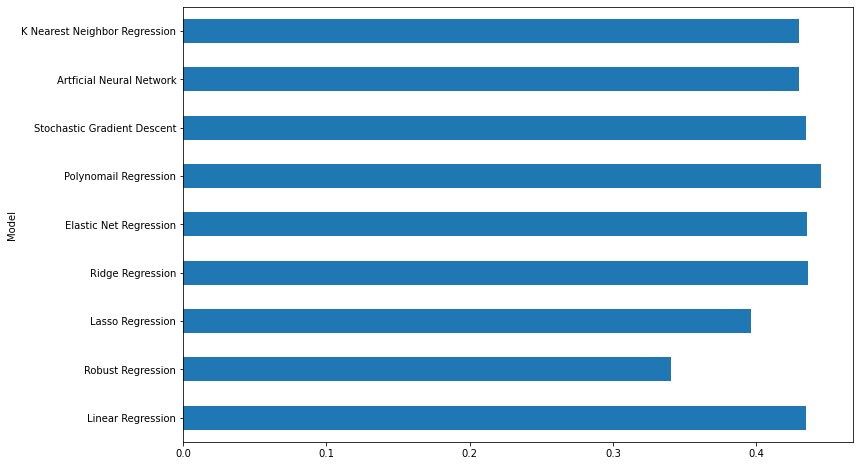

In [55]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))